# Introdução ao Altair

[Altair](https://altair-viz.github.io/) é uma biblioteca declarativa de visualização estatística para Python. Ela oferece uma gramática de visualização poderosa e concisa para a rápida construção de uma ampla variedade de gráficos estatísticos.

Por *declarativo*, queremos dizer que você pode fornecer uma especificação de alto nível sobre *o que* deseja incluir na visualização, em termos de *dados*, *marcas gráficas* e *canais de codificação*, em vez de ter que especificar *como* implementar a visualização por meio de laços de repetição, comandos de desenho de baixo nível, etc. A ideia central é que você declara vínculos entre campos de dados e canais de codificação visual, como o eixo x, eixo y, cor, *etc*. O restante dos detalhes do gráfico é tratado automaticamente. Com base nesse conceito de plotagem declarativa, é possível criar uma variedade surpreendente de visualizações, desde as mais simples até as mais sofisticadas, utilizando uma gramática concisa.

O Altair é baseado no [Vega-Lite](https://vega.github.io/vega-lite/), uma gramática de alto nível para gráficos interativos. O Altair oferece uma interface amigável em Python [API (Application Programming Interface)](https://en.wikipedia.org/wiki/Application_programming_interface) que gera especificações do Vega-Lite no formato [JSON (JavaScript Object Notation)](https://en.wikipedia.org/wiki/JSON). Ambientes como Jupyter Notebooks, JupyterLab e Colab podem então utilizar essa especificação para renderizar os gráficos diretamente no navegador. Para saber mais sobre a motivação e os conceitos básicos por trás do Altair e do Vega-Lite, assista ao [vídeo de apresentação do Vega-Lite na OpenVisConf 2017](https://www.youtube.com/watch?v=9uaHRWj04D4).

Este notebook irá guiá-lo pelo processo básico de criação de visualizações no Altair. Primeiro, você precisará garantir que o pacote Altair e suas dependências estejam instalados (para mais informações, consulte a [documentação de instalação do Altair](https://altair-viz.github.io/getting_started/installation.html)) ou que esteja utilizando um ambiente de notebook que já inclua as dependências pré-instaladas.

_Esse notebook é parte do [currículo de visualização de dados](https://github.com/uwdata/visualization-curriculum)._

## Importações

Para começar, devemos importar as bibliotecas necessárias: Pandas para trabalhar com _data frames_ e Altair para visualização.

In [2]:
import pandas as pd
import altair as alt

## Renderizadores

Dependendo do seu ambiente, pode ser necessário especificar um [renderizador](https://altair-viz.github.io/user_guide/display_frontends.html) para o Altair. Se você estiver utilizando o __JupyterLab__, __Jupyter Notebook__ ou __Google Colab__ com uma conexão ativa à Internet, não será necessário realizar nenhuma configuração adicional. Caso contrário, consulte a documentação sobre [Exibição de Gráficos Altair](https://altair-viz.github.io/user_guide/display_frontends.html).

## Dados

Os dados no Altair são baseados no DataFrame do Pandas, que consiste em um conjunto de colunas de dados nomeadas. Também nos referiremos regularmente às colunas de dados como campos de dados.

Ao usar o Altair, os conjuntos de dados geralmente são fornecidos como DataFrames. Alternativamente, o Altair também pode aceitar uma URL para carregar um conjunto de dados acessível pela rede. Como veremos, as colunas nomeadas do DataFrame são uma peça essencial para criar gráficos com o Altair.

Frequentemente usaremos conjuntos de dados do repositório vega-datasets. Alguns desses conjuntos de dados estão disponíveis diretamente como DataFrames do Pandas:

In [3]:
from vega_datasets import data  # importando vega_datasets
cars = data.cars()              # carregando cars como uma DataFrame do Pandas
cars.head()  

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Bases de dados da coleção vega-datasetes também podem ser acessadas pelo URL

In [4]:
data.cars.url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/cars.json'

URLs de bases de dados podem ser passados diretamente para o Altair (para os formatos com suporte como JSON e CSV), ou carregados para uma DataFrame do Pandas deste modo:


In [5]:
pd.read_json(data.cars.url).head() # load JSON data into a data frame

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Para mais informações sobre DataFrames - e algumas transformações úteis para preparar as DataFrames do panda para fazer gráficos
com o Altair! - olhe [Espeficando dados com o Altair](https://altair-viz.github.io/user_guide/data.html)

### Dados climáticos

A visualização estatística no Altair começa com um *data frame* ["limpo"](http://vita.had.co.nz/papers/tidy-data.html). Começaremos criando um *data frame* simples (`df`) contendo a média de precipitação (`precip`) para uma dada cidade (`city`) em um dado mês (`month`) :

In [6]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

,city,month,precip
0,Seattle,Apr,2.68
1,Seattle,Aug,0.87
2,Seattle,Dec,5.31
3,New York,Apr,3.94
4,New York,Aug,4.13
5,New York,Dec,3.58
6,Chicago,Apr,3.62
7,Chicago,Aug,3.98
8,Chicago,Dec,2.56


## O objeto *Chart*

O objeto fundamental no Altair é o `Chart`, que recebe um *data frame* como um único argumento:

In [7]:
chart = alt.Chart(df)

Por enquanto, nós apenas definimos o `Chart` e fornecemos o *data frame* simples que geramos acima. Ainda não mandamos o chart fazer *nada* com esses dados.

## Marcas e Codificações

<!-- With a chart object in hand, we can now specify how we would like the data to be visualized. We first indicate what kind of graphical *mark* (geometric shape) we want to use to represent the data. We can set the `mark` attribute of the chart object using the the `Chart.mark_*` methods. -->

Com um objeto gráfico em mãos, podemos agora especificar como gostaríamos que os dados fossem visualizados. Primeiramente indicamos que tipo de *marca gráfica* (forma geométrica) queremos utilizar para representar os dados. Podemos definir o atributo `mark` do objeto gráfico usando os métodos `Chart.mark_*`.

<!-- For example, we can show the data as a point using `Chart.mark_point()`: -->

Por exemplo, podemos mostrar os dados como um ponto usando `Chart.mark_point()`:

In [8]:
alt.Chart(df).mark_point()

alt.Chart(...)

<!--Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various *encoding channels*, or *channels* for short, to fields in the dataset. For example, we could *encode* the field `city` of the data using the `y` channel, which represents the y-axis position of the points. To specify this, use the `encode` method:-->

Aqui a renderização consiste em um ponto em cada linha no conjunto de dados, todos plotados uns sobre os outros, pois ainda não especificamos as posições para esses pontos.

Para separar visualmente os pontos, podemos mapear vários *canais de codificação*, ou *canais*, para campos no conjunto de dados. Por exemplo, poderíamos codificar o campo cidade dos dados usando o canal `y`, que representa a posição dos pontos no eixo y. Para especificar isso, use o método `encode`:

In [9]:
alt.Chart(df).mark_point().encode(
  y='city',
)

alt.Chart(...)

<!---The `encode()` method builds a key-value mapping between encoding channels (such as `x`, `y`, `color`, `shape`, `size`, *etc.*) to fields in the dataset, accessed by field name. For Pandas data frames, Altair automatically determines an appropriate data type for the mapped column, which in this case is the *nominal* type, indicating unordered, categorical values.

Though we've now separated the data by one attribute, we still have multiple points overlapping within each category. Let's further separate these by adding an `x` encoding channel, mapped to the `'precip'` field: -->

O método `encode()` cria um mapeamento de valor-chave entre canais de codificação (como `x`, `y`, `cor`, `forma`, `tamanho`, *etc.*) para campos no conjunto de dados, acessados ​​pelo nome do campo. Para quadros de dados Pandas, Altair determina automaticamente um tipo de dados apropriado para a coluna mapeada, que neste caso é o tipo *nominal*, indicando valores categóricos não ordenados.

Embora já tenhamos separado os dados por um atributo, ainda temos vários pontos sobrepostos em cada categoria. Vamos separá-los ainda mais adicionando um canal de codificação `x`, mapeado para o campo `'precip'`:

In [10]:
alt.Chart(df).mark_point().encode(
    x='precip',
    y='city'
)

alt.Chart(...)

<!---_Seattle exhibits both the least-rainiest and most-rainiest months!_

The data type of the `'precip'` field is again automatically inferred by Altair, and this time is treated as a *quantitative* type (that is, a real-valued number). We see that grid lines and appropriate axis titles are automatically added as well.

Above we have specified key-value pairs using keyword arguments (`x='precip'`). In addition, Altair provides construction methods for encoding definitions, using the syntax `alt.X('precip')`. This alternative is useful for providing more parameters to an encoding, as we will see later in this notebook.--->

_Seattle apresenta os meses menos chuvosos e mais chuvosos!_

O tipo de dados do campo `'precip'` é novamente inferido automaticamente pelo Altair e desta vez é tratado como um tipo *quantitativo* (ou seja, um número com valor real). Vemos que as linhas de grade e os títulos dos eixos apropriados também são adicionados automaticamente.

Acima especificamos pares de valores-chave usando argumentos de palavras-chave (`x`=`'precip'`). Além disso, Altair fornece métodos de construção para codificação de definições, usando a sintaxe alt.X('precip'). Esta alternativa é útil para fornecer mais parâmetros a uma codificação, como veremos mais adiante neste caderno.



In [11]:
alt.Chart(df).mark_point().encode(
    alt.X('precip'),
    alt.Y('city')
)

alt.Chart(...)

<!---The two styles of specifying encodings can be interleaved: `x='precip', alt.Y('city')` is also a valid input to the `encode` function. --->

Os dois estilos de especificação de codificações podem ser intercalados: `x='precip', alt.Y('city')` também é uma entrada válida para a função de codificação `encode`.

<!--In the examples above, the data type for each field is inferred automatically based on its type within the Pandas data frame. We can also explicitly indicate the data type to Altair by annotating the field name:

- `'b:N'` indicates a *nominal* type (unordered, categorical data),
- `'b:O'` indicates an *ordinal* type (rank-ordered data),
- `'b:Q'` indicates a *quantitative* type (numerical data with meaningful magnitudes), and
- `'b:T'` indicates a *temporal* type (date/time data)-->

Nos exemplos acima, o tipo de dados de cada campo é inferido automaticamente com base em seu tipo no quadro de dados do Pandas. Também podemos indicar explicitamente o tipo de dados para Altair anotando o nome do campo:

- `'b:N'` indica um tipo *nominal* (dados categóricos não ordenados),

- `'b:O'` indica um tipo *ordinal* (dados ordenados por classificação),

- `'b:Q'` indica um tipo *quantitativo* (dados numéricos com magnitudes significativas), e

- `'b:T'` indica um tipo *temporal* (dados de data/hora)

<!--For example, `alt.X('precip:N')`.

Explicit annotation of data types is necessary when data is loaded from an external URL directly by Vega-Lite (skipping Pandas entirely), or when we wish to use a type that differs from the type that was automatically inferred.

What do you think will happen to our chart above if we treat `precip` as a nominal or ordinal variable, rather than a quantitative variable? _Modify the code above and find out!_

We will take a closer look at data types and encoding channels in the next notebook of the [data visualization curriculum](https://github.com/uwdata/visualization-curriculum#data-visualization-curriculum). --->


Por exemplo, `alt.X('precip:N')`.

A anotação explícita de tipos de dados é necessária quando os dados são carregados de uma URL externa diretamente pelo Vega-Lite (ignorando totalmente o Pandas) ou quando desejamos usar um tipo diferente do tipo que foi inferido automaticamente.

O que você acha que acontecerá com nosso gráfico acima se tratarmos o precip como uma variável nominal ou ordinal, em vez de uma variável quantitativa? _Modifique o código acima e descubra!_

Examinaremos mais de perto os tipos de dados e canais de codificação no próximo caderno do [currículo de visualização de dados](https://github.com/uwdata/visualization-curriculum#data-visualization-curriculum).

## Transformaçao de dados : agregação
Para permitir mais flexibilidade em como os dados são visualizados, altair tem sintaxe embutida para *agregação* de dados. Por exemplo, nós podemos computar a média de todos os valores especificando uma função de agregação junto do nome do campo:

In [12]:
alt.Chart(df).mark_point().encode(
    x='average(precip)',
    y='city'
)

alt.Chart(...)

Agora, dentro de cada categoria do eixo X, nós vemos um único ponto refletindo a *média* dos valores dentro da categoria.

_Seattle realmente tem a menor média de precipitação das cidades? (De fato tem!) Ainda assim, será que este gráfico pode levar a uma má interpretação? Quais meses estão inclusos? O que conta como precipitação?

Altair suporta uma variedade de funções de agregação, incluindo 'count' (contar), 'min' (mínimo) , 'max' (máximo), 'average' (média) , e 'stdev' (desvio padrão). Em um futuro assunto, faremos um passeio pelas transformações de dados, incluindo agregação, ordenação, filtragem e criação de novos dados derivados de formulas de cálculo. 

## 1.7. Alterando o tipo da marca
Vamos considerar que queremos representar nossos valores agregados utilizando barras retangulares no lugar de pontos circulares. Podemos fazer isso substituindo <span style="color:deeppink">Chart.mark_point</span> por <span style="color:deeppink">Chart.mark_bar</span>:

In [13]:
alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city'
)

alt.Chart(...)

Como o campo nominal <span style="color:deeppink">a</span> é mapeado no eixo <span style="color:deeppink">y</span>, o resultado é uma gráfico de barras horizontal. Para conseguirmos uma gráfico de barras verticais, nós podemos apenas trocar as palavras-chave <span style="color:deeppink">x</span> e <span style="color:deeppink">y</span>:

In [14]:
alt.Chart(df).mark_bar().encode(
    x='city',
    y='average(precip)'
)

alt.Chart(...)

## 1.8. Personalizando uma Visualização

Por padrão, Altair / Vega-Lite faz algumas escolhas sobre as propriedades da visualização, mas estas podem ser alteradas usando métodos para personalizar o visual do gráfico. Por exemplo, podemos especificar os títulos dos eixos usando o atributo `axis` das classes de canal, modificar as propriedades de escala com o atributo `scale`, e especificar a cor da marcação usando o argumento `color` dos métodos `Chart.mark_*` para qualquer string de cor válida em CSS:



In [15]:
alt.Chart(df).mark_point(color='firebrick').encode(
    alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Valores em Escala Logarítmica')),
    alt.Y('city', axis=alt.Axis(title='Categoria')),
)

alt.Chart(...)

In [16]:
# Criar o DataFrame de exemplo
data = {
    'city': ["Seattle", "Seattle", "Seattle", "New York", "New York", "New York", "Chicago", "Chicago", "Chicago"],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
}
df = pd.DataFrame(data)

# Criar o gráfico
chart = alt.Chart(df).mark_point(color='firebrick').encode(
    alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Valores em Escala Logarítmica')),
    alt.Y('city', axis=alt.Axis(title='Categoria'))
)

# Mostrar o gráfico
chart

alt.Chart(...)

Um módulo posterior irá explorar as várias opções disponíveis para escalas, eixos e legendas, permitindo a criação de gráficos ainda mais personalizados.

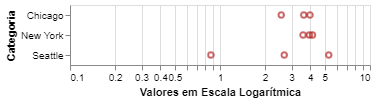

In [20]:
from IPython.display import Image
Image("./Imagens/cap1_section1.8_graf1.png")

In [23]:
from vega_datasets import data

cars = data.cars()              # load cars data as a Pandas data frame
cars.head()                     # display the first five rows

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## 1.9. Múltiplas visualizações

Como vimos acima, o objeto *Chart* do Altair representa um gráfico com um único tipo de marca. E quanto a diagramas mais complicados, envolvendo vários gráficos ou camadas? Usando um conjunto de operadores de composição de visualização, o Altair pode pegar várias definições de gráfico e combiná-las para criar visualizações mais complexas.

Como ponto de partida, vamos plotar o conjunto de dados dos carros em um gráfico de linhas mostrando a quilometragem média por ano de fabricação:

In [24]:
alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

alt.Chart(...)

Para aumentar esse gráfico, podemos adicionar marcas de círculo para cada ponto de dados médio. (As marcas de círculo são apenas uma abreviação conveniente para marcas de pontos que usaram círculos preenchidos.)

Podemos começar definindo cada gráfico separadamente: primeiro um gráfico de linha, depois um gráfico de dispersão. Podemos então usar o operador *layer* para combinar os dois em um gráfico em camadas. Aqui usamos o operador abreviado *+* (mais) para invocar camadas:

In [25]:
line = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

point = alt.Chart(cars).mark_circle().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

line + point

alt.LayerChart(...)

Também podemos criar este gráfico reutilizando e modificando uma definição de gráfico anterior! Em vez de reescrever completamente um gráfico, podemos começar com o gráfico de linhas e, em seguida, invocar métodos *mark_point* para gerar uma nova definição de gráfico com um tipo de marca diferente:

In [26]:
mpg = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

mpg + mpg.mark_circle()

alt.LayerChart(...)

(A necessidade de colocar pontos em linhas é tão comum que essas marcas de linhas também incluem uma abreviação para gerar uma nova camada para você. Tente adicionar o argumento *point = True* aos métodos *mark-line*)

Agora, e se quiséssemos ver esse gráfico junto com outros gráficos, como a potência média ao longo do tempo?

Podemos usar operadores de concatenação para colocar vários gráficos lado a lado, vertical ou horizontalmente. Aqui, usaremos o | operador (pipe) para executar a concatenação horizontal de dois gráficos:

In [27]:
hp = alt.Chart(cars).mark_line().encode(
    alt.X('Year'),
    alt.Y('average(Horsepower)')
)

(mpg + mpg.mark_circle()) | (hp + hp.mark_circle())

alt.HConcatChart(...)

Podemos ver que, neste conjunto de dados, ao longo da década de 1970 e início da década de 1980, a eficiência média de combustível melhorou enquanto a potência média diminuiu.

Um notebook posterior se concentrará na composição da visualização, icluindo não apenas camadas e concatenação, mas também o operador *facet* para dividir dados em subplots e o operador *repeat* para gerar concisamente gráficos concatenados a partir de um modelo.

In [28]:
cars = data.cars()

## 1.10. Interatividade
Além da construção de gráficos básicos e da composição de visualização, uma das ferramentas mais interessantes do Altair e do Vega-Lite é o suporte para interação.

Para criar um gráfico interativo simples que suporte panorâmica e zoom, podemos invocar o método `interactive()` do objeto `Chart`. No gráfico abaixo, clique e arraste para panorâmica ou use a rolagem para zoom:

In [29]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower', # Potência do motor
    y='Miles_per_Gallon', # Milhas por galão
    color='Origin', # Origem
).interactive()

alt.Chart(...)

Para fornecer mais detalhes ao passar o mouse, podemos utilizar o canal de codificação `tooltip`.

In [30]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower', # potência (cavalo-vapor)
    y='Miles_per_Gallon', # milhas por galão
    color='Origin', # origem
    tooltip=['Name', 'Origin'] # Mostra o nome e a oriegem em um 'tooltip'
).interactive()

alt.Chart(...)

Para interações mais complexas, como gráficos vinculados e filtragem cruzada, o Altair fornece uma abstração de seleção para definir seleções interativas e, em seguida, vinculá-las a componentes de um gráfico. Abordaremos isso em detalhes em um notebook posterior.

Abaixo está um exemplo mais complexo. O histograma superior mostra a contagem de carros por ano e usa uma seleção interativa para modificar a opacidade dos pontos no diagrama de dispersão inferior, que mostra potência vs quilometragem (milhas por galão).

Arraste um intervalo no gráfico superior e veja como ele afeta os pontos no gráfico inferior. Ao examinar o código, **não se preocupe se as partes ainda não fizerem sentido!** Este é um exemplo aspiracional, preencheremos todos os detalhes necessários ao longo dos diferentes notebooks.

In [ ]:
# cria uma seleção de intervalo sobre uma codificação do eixo x
brush = alt.selection_interval(encodings=['x'])

# determina a opacidade com base no pincel
opacity = alt.condition(brush, alt.value(0.9), alt.value(0.1))

# Um histograma de carros por ano
# adicione o pincel de intervalo para selecionar carros ao longo do tempo
overview = alt.Chart(cars).mark_bar().encode(
    alt.X('Year:O', timeUnit='year', # extrai a unidade ano, trata como ordinal
      axis=alt.Axis(title=None, labelAngle=0) # sem título, sem ângulo na legenda
    ),
    alt.Y('count()', title=None), # contagem, sem título no eixo
    opacity=opacity
).add_selection(
    brush      # adiciona seleção de pincel de intervalo ao gráfico
).properties(
    width=400, # define a largura do gráfico para 400 pixels
    height=50  # define a altura do gráfico para 50 pixels
)

# o gráfico de dispersão detalhado de  potência vs. quilometragem (milhas por galão)
# modular a opacidade do ponto com base na seleção do pincel
detail = alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower'), 
    alt.Y('Miles_per_Gallon'),
    # define opacidade com base na seleção do pincel
    opacity=opacity
).properties(width=400) # define a largura do gráfico para corresponder ao primeiro gráfico

# concatena verticalmente (vconcat) gráficos usando o operador '&'
overview & detail

In [32]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})


## 1.11. Nota : Examinando a saída JSON

Como uma API do python para vega-lite, o objetivo principal foi converter especificações de plot para uma string JSON para se conformar com o esquema de Vega-lite. Usando o método 'Chart.to_json', nós podemos inspecionar as as especificações que Altair está exportando e mandando para o Vega-Lite:


In [33]:
chart = alt.Chart(df).mark_bar().encode(
x='average(precip)',
y='city'
    )
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.20.1.json",
  "config": {
    "view": {
      "continuousHeight": 300,
      "continuousWidth": 300
    }
  },
  "data": {
    "name": "data-8e72c2f67818e64f2c6d729f1a903405"
  },
  "datasets": {
    "data-8e72c2f67818e64f2c6d729f1a903405": [
      {
        "city": "Seattle",
        "month": "Apr",
        "precip": 2.68
      },
      {
        "city": "Seattle",
        "month": "Aug",
        "precip": 0.87
      },
      {
        "city": "Seattle",
        "month": "Dec",
        "precip": 5.31
      },
      {
        "city": "New York",
        "month": "Apr",
        "precip": 3.94
      },
      {
        "city": "New York",
        "month": "Aug",
        "precip": 4.13
      },
      {
        "city": "New York",
        "month": "Dec",
        "precip": 3.58
      },
      {
        "city": "Chicago",
        "month": "Apr",
        "precip": 3.62
      },
      {
        "city": "Chicago",
        "month": "Aug",

Note que 'encode(x='average(precip)')' expandiu para uma estrutura de JSON como um nome de 'field', um 'type' para a data, e inclui um campo 'agregated'. O trecho 'encode(y='city')' foi expandido de forma similar.
Assim como vimos antes, a sintaxe abreviada de Altair inclui uma forma de especificar o tipo de campo também:

Assim como vimos antes, a sintaxe abreviada de Altair inclui uma forma de especificar o tipo de campo também:\n"

In [34]:
x = alt.X('average(precip):Q')
print(x.to_json())

{
  "aggregate": "average",
  "field": "precip",
  "type": "quantitative"
}


Essa abreviação é equivalente a digitar os atributos por nome:


In [35]:
x = alt.X(aggregate='average', field='precip', type='quantitative')
print(x.to_json())

{
  "aggregate": "average",
  "field": "precip",
  "type": "quantitative"
}


## Publicando uma visualização

Depois de ter visualizado os seus dados, é possível que você queira publicá-los em algum local na Web. Isto pode ser feito diretamente usando o [pacote JavaScript vega-embed](https://github.com/vega/vega-embed). Um exemplo simples de um documento HTML independente pode ser gerado para qualquer gráfico usando o método `Chart.save`:

```python
chart = alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city',
)
chart.save('chart.html')
```

O modelo HTML básico produz uma saída parecida com esta, onde a especificação JSON para o seu gráfico produzida por `Chart.to_json` deve ser armazenada na variável JavaScript `spec`:


```html
<!DOCTYPE html>
<html>
  <head>
    <script src="https://cdn.jsdelivr.net/npm/vega@5"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-lite@4"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-embed@6"></script>
  </head>
  <body>
  <div id="vis"></div>
  <script>
    (function(vegaEmbed) {
      var spec = {}; /* JSON output for your chart's specification */
      var embedOpt = {"mode": "vega-lite"}; /* Options for the embedding */

      function showError(el, error){
          el.innerHTML = ('<div style="color:red;">'
                          + '<p>JavaScript Error: ' + error.message + '</p>'
                          + "<p>This usually means there's a typo in your chart specification. "
                          + "See the javascript console for the full traceback.</p>"
                          + '</div>');
          throw error;
      }
      const el = document.getElementById('vis');
      vegaEmbed("#vis", spec, embedOpt)
        .catch(error => showError(el, error));
    })(vegaEmbed);
  </script>
</body>
</html>
 ```
O método `Chart.save` fornece uma maneira conveniente de salvar essa saída HTML em um arquivo. Para mais informações sobre a incorporação do Altair/Vega-Lite, veja a [documentação do projeto vega-embed](https://github.com/vega/vega-embed).

## Próximos passos

Parabéns, você terminou a introdução ao Altair! No próximo capítulo, vamos aprofundar a criação de visualizações usando o modelo de tipos de dados, marcas gráficas e canais de codificação visual do Altair.

## Exemplos

Essa seção lista alguns exemplos de gráficos gerados a partir dos _data frames_ da biblioteca vega_datasets.

In [49]:
from vega_datasets import data

### Exemplo 1: Empregos

In [36]:
jobs = data.jobs() # Selecionado o data frame de profissões
jobs.head()

,job,sex,year,count,perc
0,Accountant / Auditor,men,1850,708,0.000131
1,Accountant / Auditor,men,1860,1805,0.000214
2,Accountant / Auditor,men,1870,1310,0.000100
3,Accountant / Auditor,men,1880,2295,0.000125
4,Accountant / Auditor,men,1900,11753,0.000396


Vamos analisar a profissão Engenheiro. Para isso, filtraremos o data frame para exibir apenas as informações dessa profissão:

In [37]:
engineer_filter = jobs['job'] == "Engineer" 
engineer_data = jobs[engineer_filter]

engineer_data.head()

,job,sex,year,count,perc
2220,Engineer,men,1850,0,0.000000
2221,Engineer,men,1860,0,0.000000
2222,Engineer,men,1870,101,0.000008
2223,Engineer,men,1880,0,0.000000
2224,Engineer,men,1900,1006,0.000034


Agora, vamos renomear os textos da tabela para melhor exibição:

In [38]:
engineer_data.loc[:,'job'] = engineer_data['job'].replace({"Engineer": "Engenheiro"})
engineer_data.loc[:,'sex'] = engineer_data['sex'].replace({"men": "Homens", "women": "Mulheres"})
engineer_data.columns = ["Profissão", "Sexo", "Ano", "Contagem", "Percentual"]

engineer_data.head()

,Profissão,Sexo,Ano,Contagem,Percentual
2220,Engenheiro,Homens,1850,0,0.000000
2221,Engenheiro,Homens,1860,0,0.000000
2222,Engenheiro,Homens,1870,101,0.000008
2223,Engenheiro,Homens,1880,0,0.000000
2224,Engenheiro,Homens,1900,1006,0.000034


Agora podemos exibir um gráfico a partir desses dados:

In [39]:
jobs_chart = alt.Chart(engineer_data).mark_point().encode(
    x = alt.X('Ano', scale=alt.Scale(domain=[1850, 2000])),
    y = alt.Y('Contagem', title="Número de engenheiros"),
    color = 'Sexo'
).properties(
    title = "Número de engenheiros por ano"
)

jobs_chart

alt.Chart(...)

### Exemplo 2: Colisões aéreas com passáros

In [40]:
bird = data.birdstrikes() #dados sobre acidentes aéreos envolvendo aves
bird.head()

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Flight_Date,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1/8/90 0:00,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/9/90 0:00,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1/11/90 0:00,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1/11/90 0:00,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/12/90 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0


In [41]:
# Especificar o formato da data. Temos o formato 'YYYY-MM-DD':
bird['Flight_Date'] = pd.to_datetime(bird['Flight_Date'], format='%Y-%m-%d', errors='coerce')

# Extrair o ano da coluna 'Flight_Date' e criar uma nova coluna 'year'
bird['year'] = bird['Flight_Date'].dt.year

# Contagem de colisões por ano
bird_counts = bird.groupby('year').size().reset_index(name='colisões')

# Gerar gráfico de barras
chart = alt.Chart(bird_counts).mark_bar().encode(
    alt.X('year:O', title='Ano'),
    alt.Y('colisões:Q', title='Número de Colisões'),
    alt.Color('year:N', title='Ano'),
    tooltip=['year', 'colisões']
).properties(
    title='Distribuição de Colisões de Aves por Ano'
)

chart.show()

alt.Chart(...)

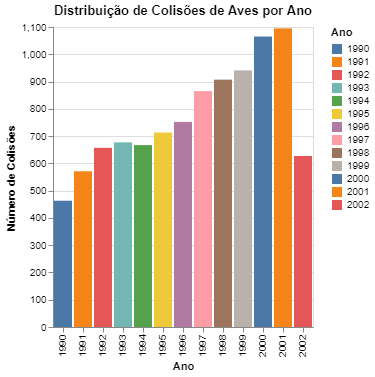

In [42]:
from IPython.display import Image
Image("Imagens/aves.png")

### Exemplo 3: Ações

In [43]:
stocks = data.stocks() #escolha de um banco de dados de ação.
#este gráfico mostra a evolução de valor de algumas ações ao longo do tempo.
alt.Chart(stocks).mark_line().encode(
    alt.X('date:T'),
    alt.Y('price:Q'), 
    alt.Color('symbol:N') 
) # caso tivessem outras variáveis a serem expressas pelo gráfico, poderiam ter sido usadas outros marcadores como opacidade ou tamanho.

alt.Chart(...)

In [44]:
alt.Chart(stocks).mark_point().encode( 
    x='stdev(price)',
    y='symbol'
) #ao analisar o gráfico, podemos ver que a ordem de desvio padrão a seguir é coerente com o último gráfico.

alt.Chart(...)

### Exemplo 4: Gapminder


In [ ]:
# Load the Gapminder dataset
gapminder = data.gapminder()

# Apply the mapping to create a new 'continent' column
gapminder['continent'] = gapminder['cluster'].map(cluster_to_continent)

# Create the bubble chart
chart = alt.Chart(gapminder).mark_circle().encode(
    x=alt.X('fertility:Q', title='Taxa de Fertilidade'),
    y=alt.Y('life_expect:Q', title='Expectativa de Vida'),
    size=alt.Size('pop:Q', title='População', scale=alt.Scale(range=[10, 1000])),
    color=alt.Color('continent:N', legend=None),  # Remove legend for continents
    tooltip=['country:N', 'year:O', 'fertility:Q', 'life_expect:Q', 'pop:Q', 'continent:N']
).properties(
    width=700,
    height=400,
    title='Relação entre Taxa de Fertilidade, Expectativa de Vida e População por Continente'
).interactive()

chart.show()


### Exemplo 5: iwoa-eletricity

In [51]:
source = data("iowa-electricity")

source['Total'] = source.groupby('year')['net_generation'].transform('sum')

chart = alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='sum(net_generation):Q',
    color='source:N',
    tooltip=['year:O', 'source:N', 'sum(net_generation):Q', 'Total:Q']
).properties(
    width=800,
    height=400,
    title='Consumo de energia por fonte e ano'
)

chart.show()


alt.Chart(...)

### Exemplo 6: (Bactérias vs. Insulina)

In [52]:
burtin = data.burtin()

alt.Chart(burtin).mark_point().encode( # Cria um gráfico interativo como zoom e panorâmica.
    x='Penicillin',
    y='Bacteria',
    color='Genus',
    tooltip=['Bacteria', 'Genus'] # Ao passarmos o mouse, mostra qual a bactéria relacionada e seu gênero.
).interactive()

alt.Chart(...)

### Exemplo 7: Crimeia

Dados das baixas militares da guerra da Crimeia.

In [53]:
df = data.crimea()

alt.Chart(df).mark_point().encode(
    x=alt.X('date', title='Data'),
    y=alt.Y('wounds:Q', title='Baixas por ferimentos'),
    color=alt.Color('disease:Q', title='Baixas por doenças'),
    size=alt.Size('other:Q', title='Baixas por motivos diversos'),
    tooltip=['date', 'wounds:Q', 'disease:Q', 'other:Q']
).interactive().properties(
    title='Baixas Guerra da Crimeia',  
    width=800,
    height=400
)


alt.Chart(...)

### Exemplo 8: iowa_electricity

In [54]:
# Carregar o dataset 'iowa-electricity'
iowa_electricity = data.iowa_electricity()

# Transformar a coluna 'year' para exibir apenas os 4 primeiros dígitos
iowa_electricity['year'] = iowa_electricity['year'].astype(str).str[:4].astype(int)


# Criar gráfico com o dataset modificado
chart = alt.Chart(iowa_electricity).mark_line().encode(
    x=alt.X('year:O', axis=alt.Axis(title='Ano')),  # Ano no eixo X
    y='net_generation:Q',  # Geração líquida no eixo Y
    color='source:N',  # Cor por fonte
    tooltip=['year:O', 'source:N', 'net_generation:Q']
).properties(
    title="Geração de Eletricidade em Iowa (Ano Modificado)",
    width=600,
    height=400
)

chart

alt.Chart(...)

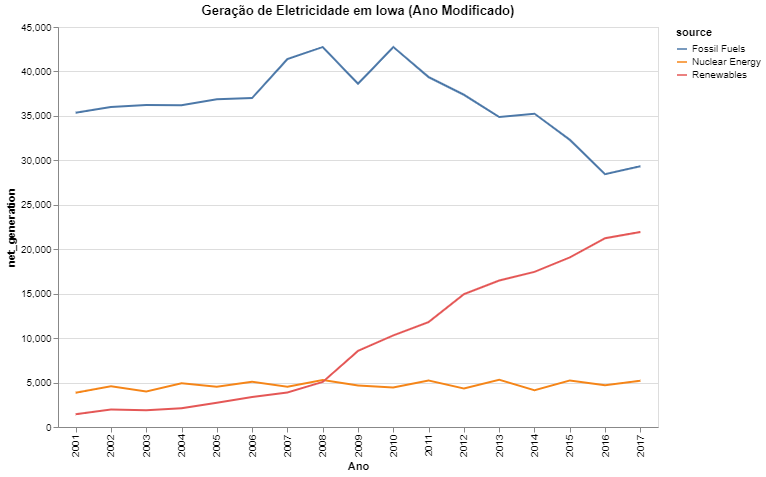

In [58]:
from IPython.display import Image
Image("./Imagens/cap1_example1.8_graf1.png")

### Exemplo 9: Gapminder

In [56]:
gapminder = data.gapminder()
afghanistan = gapminder[gapminder['country'] == 'Afghanistan']
afghanistan.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


In [57]:
# Criando um gráfico de linhas: Evolução da expectativa de vida no Afeganistão
chart = alt.Chart(afghanistan).mark_line().encode(
    x=alt.X('year:O', title='Anos'),
    y=alt.Y('life_expect:Q', title='Expectativa de Vida da População'),
    tooltip=['year:O', 'life_expect:Q']
).properties(
    title='Evolução da Expectativa de Vida no Afeganistão ao longo dos Anos',
    width=800,
    height=400
).interactive()

chart.show()

alt.Chart(...)

### Exemplo 10: Energia em Iowa
Nosso objetivo aqui é analisar uma base de dados que contém informações sobre as principais fontes de energia do estado de Iowa ao longo das últimas duas décadas. O que vamos buscar analisar será a diferença na proporção da produção de energia entre as diferentes fontes, e também, observar o taxa de variação na produção com base na fonte ao longo desse período.

Agora, precisamos selecionar os dados que usaremos, em nosso caso, aqueles que correspondem as informações sobre a energia em Iowa

In [17]:
energ = data.iowa_electricity()
fossil = energ[energ['source']=='Fossil Fuels']
nuclear = energ[energ['source']=='Nuclear Energy']
renewable = energ[energ['source']=='Renewables']

Agora que separamos os dados que observaremos a taxa de variação, devemos inserir mais um dado, pois nosso Dataset apenas possui informações de ano e produção, porém queremos observar a variação da produção ao longo do tempo. Para isso, usaremos a função <span style='color:red'>pct_change()</span>, que calcula a variação percentual entre os valores consecutivos.

In [ ]:
fossil["variation"] = fossil["net_generation"].pct_change() * 100
nuclear["variation"] = nuclear["net_generation"].pct_change() * 100
renewable["variation"] = renewable["net_generation"].pct_change() * 100

Agora, com os dados que queremos, vamos fazer três gráficos diferentes, e depois uní-los para observar como a variação ao longo do tempo se dá para cada matriz energética.

In [19]:
gf = alt.Chart(fossil).mark_line().encode(
    alt.X('year'),
    alt.Y('variation'),
    color='source'
)
gn = alt.Chart(nuclear).mark_line().encode(
    alt.X('year'),
    alt.Y('variation'),
    color='source'
)
gr = alt.Chart(renewable).mark_line().encode(
    alt.X('year'),
    alt.Y('variation'),
    color='source'
)
graf = gf+gn+gr
graf

alt.LayerChart(...)

Com esse gráfico, podemos analisar e buscar entender os fatores que levaram a tais variações, porém, nosso intuito aqui era apenas observar como ocorria esse comportamento.

Agora, vamos observar a proporção da produção de cada uma das matrizes do estado de Iowa. Para isso, podemos fazer um gráfico de barras simples (histograma) e analisar as discrepâncias na produção de energia de determinadas fontes. 

In [21]:
alt.Chart(energ).mark_bar().encode(
    alt.X('year'),
    alt.Y('net_generation'),
    color='source'
)

alt.Chart(...)

Com esse tipo de gráfico podemos concluir várias coisas, como o aumento na produção total, o aumento do uso de energias renováveis, porém, podemos buscar entender a razão por trás de tais variações, mas como não é esse o foco aqui, deixo a cargo do leitor.

### Exemplo 11: seattle-temps

In [60]:
# Ler o CSV sem cabeçalho e nomeando as colunas manualmente
dados = data.seattle_temps()
dados

,date,temp
0,2010-01-01 00:00:00,39.4
1,2010-01-01 01:00:00,39.2
2,2010-01-01 02:00:00,39.0
3,2010-01-01 03:00:00,38.9
4,2010-01-01 04:00:00,38.8
...,...,...
8754,2010-12-31 19:00:00,40.7
8755,2010-12-31 20:00:00,40.5
8756,2010-12-31 21:00:00,40.2
8757,2010-12-31 22:00:00,40.0


In [61]:
# Tentar converter a coluna 'date' para o tipo datetime
try:
    dados['date'] = pd.to_datetime(dados['date'], format='%Y/%m/%d %H:%M')
except Exception as e:
    print(f'Erro ao converter a data: {e}')
    print('Tentando detectar o formato automaticamente...')
    dados['date'] = pd.to_datetime(dados['date'])


In [62]:
# Extrair o ano e o mês da coluna 'data'
dados['ano'] = dados['date'].dt.year
dados['mes'] = dados['date'].dt.month

In [63]:
# Calcular a temperatura média por mês e ano
dados_media_mensal = dados.groupby(['ano', 'mes'])['temp'].mean().reset_index()

In [64]:
# Adicionar uma coluna de data ajustada para o dia 15 de cada mês
dados_media_mensal['date'] = pd.to_datetime(
    dados_media_mensal['ano'].astype(str) + '-' + dados_media_mensal['mes'].astype(str) + '-15'
    )

In [65]:
# Calcular médias semanal e diária
dados.set_index('date', inplace=True)
dados_semanal = dados.resample('W')['temp'].mean().reset_index()
dados_diario = dados.resample('D')['temp'].mean().reset_index()

In [73]:
# Gráfico da média mensal
grafico_mensal = alt.Chart(dados_media_mensal).mark_line(point=True).encode(
    x=alt.X('date:T', title='Mês'),
    y=alt.Y('temp:Q', title='Temperatura Média (°F)'),
    color=alt.Color('ano:N', legend=alt.Legend(title="Ano")),
    tooltip=['ano', 'mes', 'temp']
).properties(
    title='Temperatura Média Mensal em Seattle',
    width=800,
    height=400
)

In [74]:
# Gráfico da média semanal
grafico_semanal = alt.Chart(dados_semanal).mark_line(color='orange').encode(
    x=alt.X('date:T', title='Semana'),
    y=alt.Y('temp:Q', title='Temperatura Média (°F)'),
    tooltip=['date', 'temp']
).properties(
    title='Temperatura Média Semanal em Seattle',
    width=800,
    height=400
)

In [75]:
# Gráfico da média diária
grafico_diario = alt.Chart(dados_diario).mark_line(color='green').encode(
    x=alt.X('date:T', title='Dia'),
    y=alt.Y('temp:Q', title='Temperatura Média (°F)'),
    tooltip=['date', 'temp']
).properties(
    title='Temperatura Média Diária em Seattle',
    width=800,
    height=400
)

In [76]:
# Gráfico combinado
grafico_combinado = alt.layer(
    alt.Chart(dados_media_mensal).mark_line(color='blue').encode(
        x='date:T',
        y='temp:Q',
        tooltip=['date', 'temp']
    ).properties(title='Temperatura Média (Mensal, Semanal, Diária)'),
    alt.Chart(dados_semanal).mark_line(color='orange').encode(
        x='date:T',
        y='temp:Q'
    ),
    alt.Chart(dados_diario).mark_line(color='green').encode(
        x='date:T',
        y='temp:Q'
    )
).resolve_scale(
    y='shared'
).properties(
    width=800,
    height=400
)

In [77]:
# Exibir os gráficos
grafico_mensal
grafico_semanal
grafico_diario
grafico_combinado

alt.LayerChart(...)